#### Importar a Base de dados

In [4]:
import pandas as pd 
tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória


In [40]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
tabela.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


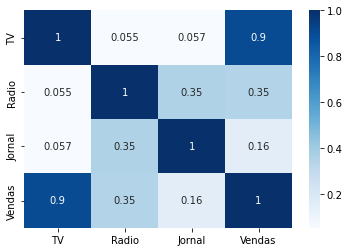

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(tabela.corr(), cmap = 'Blues', annot = True)
plt.show()


#### Treinando o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [24]:
y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split
x_treino, x_teste , y_treino , y_teste = train_test_split(x,y , test_size = 0.2)



#### Escolhendo os modelos:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()



### Treinando os modelos

In [41]:
modelo_regressaolinear.fit(x_treino , y_treino)
modelo_arvoredecisao.fit(x_treino , y_treino)


RandomForestRegressor()

#### Testando o Melhor Modelo r2_score


In [26]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Comparando os modelos
from sklearn.metrics import r2_score
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))


0.9208157185928139
0.9550867607431208


#### Visualização Gráfica das Previsões

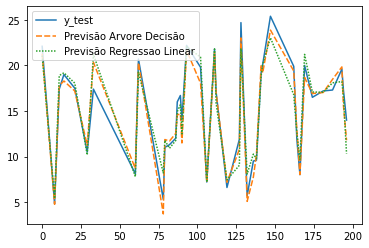

In [34]:
tabelaprevisao = pd.DataFrame()
tabelaprevisao['y_test'] = y_teste
tabelaprevisao['Previsão Arvore Decisão'] = previsao_arvoredecisao
tabelaprevisao['Previsão Regressao Linear'] = previsao_regressaolinear

tabelaprevisao

sns.lineplot(data = tabelaprevisao)
plt.show()

#### Como fazer uma nova previsão?

In [35]:
novos_valores = pd.read_csv('novos.csv')
display(novos_valores)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [36]:
previsao = modelo_arvoredecisao.predict(novos_valores)
previsao

array([ 7.82 ,  8.688, 20.3  ])

In [37]:
novos_valores['Previsão de vendas'] = previsao
display(novos_valores)

,TV,Radio,Jornal,Previsão de vendas
0,23.1,3.8,69.2,7.820
1,44.5,0.0,5.1,8.688
2,170.2,45.9,0.0,20.300
